<a href="https://colab.research.google.com/github/souchem23/data-science-coursework/blob/main/Unit7/SoumikC_U7Proj_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Unit 7 Project: Humidity Prediction**

In the context of global warming, we know that global temperatures will rapidly increase, creating significant detrimental issues. Thus, I undertook this project to predict how our humidity will change, and I will use various meterological factors to predict it.

**Context**

Solar radiation has been increasing over the last few years, and is fueling climate change in our modern society. This is likely due to holes and the weakening of our ozone layer.

*   It is very important to predict these changes in humidity so that we can better anticipate climate change.
*   We can anlayze meteorological factors and changes in order to determine how humidity is present in our modern society.
*   I am fascinated in climate change, and I want to know how we can better predict the effects of humidity and radiation.



## **Package Installation**

In [1]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi
!pip install preliz

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-lo1wduz9
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-lo1wduz9
  Resolved https://github.com/pydata/xarray.git to commit 0184702f16c3f744fc9096c7dac690626dcc6922
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev22+g0184702f-py3-none-any.whl size=1262235 sha256=484c4baa540335a0b938adf0bd660876743a56363a7217624e92701814535d06
  Stored in directory: /tmp/pip-ephem-wheel-cache-6zps3wdy/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.7 MB/s eta 0:00:00
   ━

In [2]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb
import pymc as pm

## **Data Processing**

In [3]:
# Reading in the data
solarDataURL = 'https://raw.githubusercontent.com/souchem23/data-science-coursework/refs/heads/main/solar.csv'

# Creating dataframe representation
solarData = pd.read_csv(solarDataURL)
solarData = solarData.head(1000)

# Display processed data
solarData

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
995,1474919419,9/26/2016 12:00:00 AM,09:50:19,833.84,57,30.45,72,87.81,6.75,06:12:00,18:15:00
996,1474919118,9/26/2016 12:00:00 AM,09:45:18,821.11,57,30.45,69,91.00,3.37,06:12:00,18:15:00
997,1474918826,9/26/2016 12:00:00 AM,09:40:26,805.68,58,30.45,65,2.38,4.50,06:12:00,18:15:00
998,1474918520,9/26/2016 12:00:00 AM,09:35:20,791.78,57,30.45,66,61.29,10.12,06:12:00,18:15:00


## **Casual Diagram**

In [35]:
import graphviz

dot = graphviz.Digraph(format='png')

dot.node("Radiation", "Radiation")
dot.node("Temperature", "Temperature")
dot.node("Pressure", "Pressure")
dot.node("Humidity", "Humidity")
dot.node("WindDirection", "Wind Direction")
dot.node("Speed", "Wind Speed")

dot.edge("Radiation", "Temperature")
dot.edge("Radiation", "Pressure")
dot.edge("Radiation", "Humidity")
dot.edge("Radiation", "WindDirection")
dot.edge("Radiation", "Speed")

dot.edge("Temperature", "Pressure")
dot.edge("Temperature", "Humidity")
dot.edge("Temperature", "Speed")

dot.edge("Pressure", "Speed")
dot.edge("Pressure", "WindDirection")

dot.edge("Speed", "WindDirection")

dot.edge("WindDirection", "Humidity")

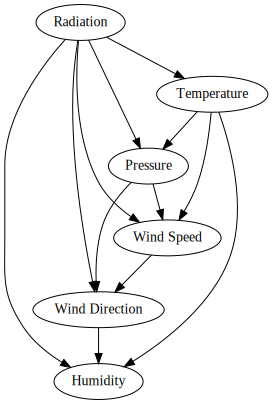

In [36]:
dot

**Selected Variables**

For this project, I will chosoe to create model using the following variables:

*   Temperature
*   Radiation
*   Wind Direction

Looking at my casual diagrams, I was able to observe that these three variables directly affect humidity, and I will use these variables to also observe the interactions between the variables.



## **Chosen Models**

**Knots**

In [7]:
knots_one = [45,50]
knots_two = [30.36,30.47]
knots_three = [0,30]

**Linear Model**

In [37]:
linmodel1 = bmb.Model("Humidity ~ Temperature + Radiation + WindDirection", data=solarData)
idatalin1 = linmodel1.fit(idata_kwargs={'log_likelihood': True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


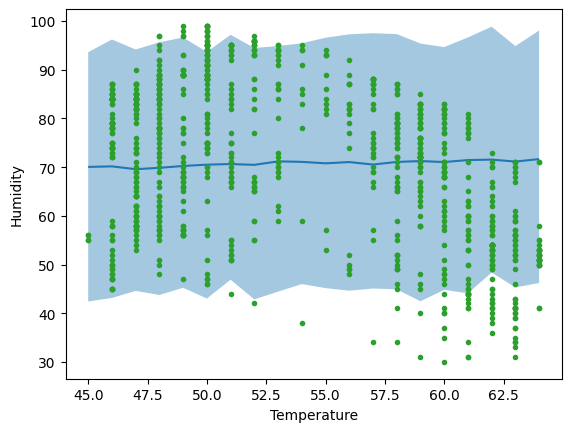

In [38]:
bmb.interpret.plot_predictions(linmodel1, idatalin1, "Temperature", pps=True)
plt.plot(solarData.Temperature,solarData.Humidity, "C2.")

**Model 1**

In [39]:
model_poly = bmb.Model("Humidity ~ poly(Temperature, degree=4)", solarData, family="negativebinomial")
idata_poly = model_poly.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


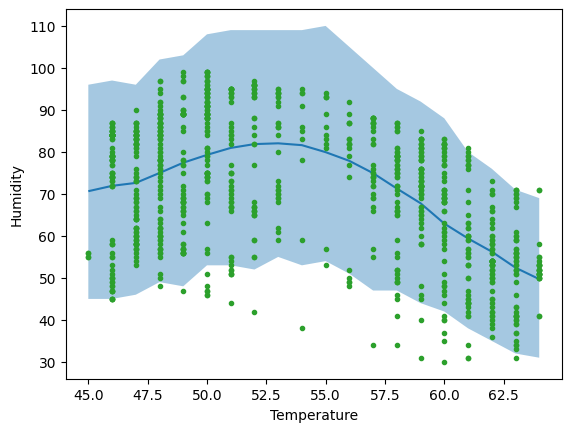

In [40]:
bmb.interpret.plot_predictions(model_poly, idata_poly, "Temperature", pps=True)
plt.plot(solarData.Temperature,solarData.Humidity, "C2.")

**Model 2**

In [41]:
model_poly2 = bmb.Model("Humidity ~ poly(Temperature+Radiation, degree=4)", solarData, family="negativebinomial")
idata_poly2 = model_poly2.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


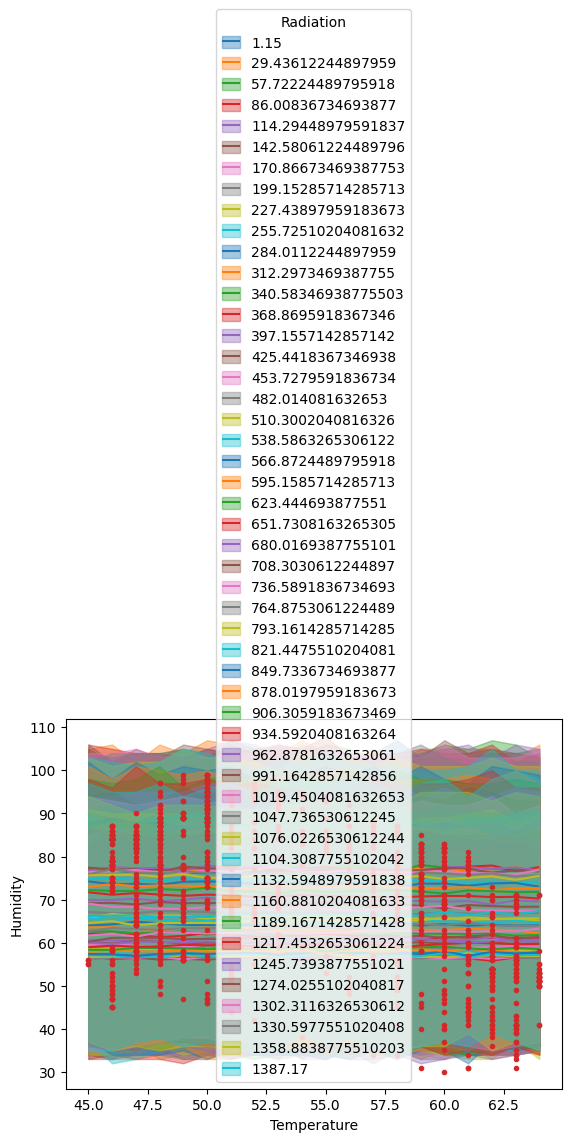

In [44]:
bmb.interpret.plot_predictions(model_poly2, idata_poly2, ["Temperature", "Radiation"], pps=True)
plt.plot(solarData.Temperature,solarData.Humidity, "C3.")

**Model 3**

In [ ]:
num_knots = 6
knots = np.linspace(45, 50, num_knots+2)[1:-1]
bspline_1 = bmb.Model(
    "Humidity ~ bs(Temperature, knots=knots)",
    solarData,
    family="negativebinomial"
)
idata_1 = bspline_1.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


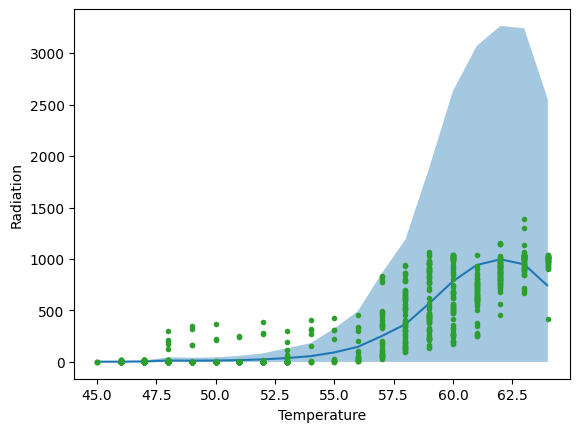

In [13]:
bmb.interpret.plot_predictions(bspline_1, idata_1, "Temperature", pps=True)
plt.plot(solarData.Temperature,solarData.Radiation, "C2.")

**Model 4**

In [14]:
num_knots = 3
knots1 = np.linspace(knots_one[0], knots_one[1], num_knots+2)[1:-1]
knots2 = np.linspace(knots_two[0], knots_two[1], num_knots+2)[1:-1]
knots3 = np.linspace(knots_three[0], knots_three[1], num_knots+2)[1:-1]
bspline_3 = bmb.Model(
    "Radiation ~ bs(Temperature, knots=knots1) + bs(Pressure, knots=knots2)",
    solarData,
    family="negativebinomial"
)
idata_3 = bspline_3.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


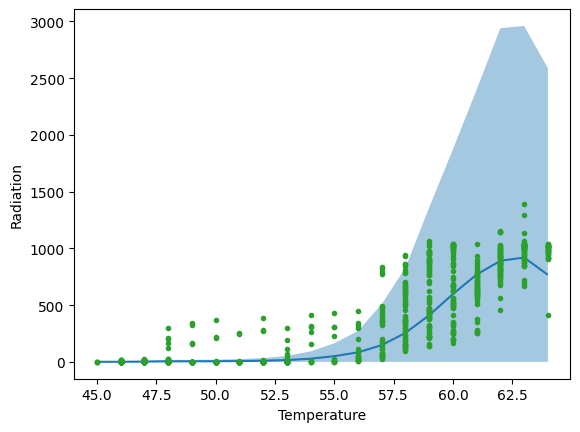

In [25]:
bmb.interpret.plot_predictions(bspline_3, idata_3, "Temperature", pps=True)
plt.plot(solarData.Temperature,solarData.Radiation, "C2.")

**Model 5**

In [15]:
num_knots = 3
knots1 = np.linspace(knots_one[0], knots_one[1], num_knots+2)[1:-1]
knots2 = np.linspace(knots_two[0], knots_two[1], num_knots+2)[1:-1]
knots3 = np.linspace(knots_three[0], knots_three[1], num_knots+2)[1:-1]
bspline_4 = bmb.Model(
    "Radiation ~ bs(Temperature, knots=knots1) + bs(WindDirection, knots=knots3)",
    solarData,
    family="negativebinomial"
)
idata_4 = bspline_4.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


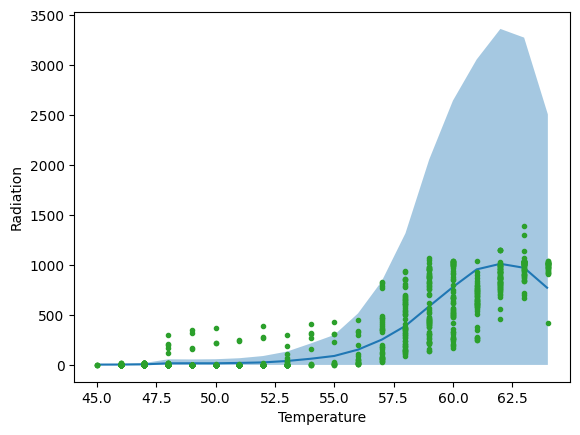

In [26]:
bmb.interpret.plot_predictions(bspline_4, idata_4, "Temperature", pps=True)
plt.plot(solarData.Temperature,solarData.Radiation, "C2.")

**Model 6**

In [16]:
num_knots = 3
knots1 = np.linspace(knots_one[0], knots_one[1], num_knots+2)[1:-1]
knots2 = np.linspace(knots_two[0], knots_two[1], num_knots+2)[1:-1]
knots3 = np.linspace(knots_three[0], knots_three[1], num_knots+2)[1:-1]
bspline_5 = bmb.Model(
    "Radiation ~ bs(Pressure, knots=knots2) + bs(WindDirection, knots=knots3)",
    solarData,
    family="negativebinomial"
)
idata_5 = bspline_5.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


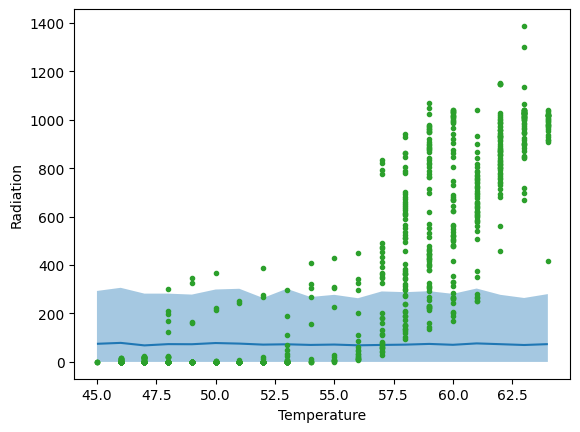

In [27]:
bmb.interpret.plot_predictions(bspline_5, idata_5, "Temperature", pps=True)
plt.plot(solarData.Temperature,solarData.Radiation, "C2.")

**Model 7**

In [17]:
num_knots = 3
knots1 = np.linspace(knots_one[0], knots_one[1], num_knots+2)[1:-1]
knots2 = np.linspace(knots_two[0], knots_two[1], num_knots+2)[1:-1]
knots3 = np.linspace(knots_three[0], knots_three[1], num_knots+2)[1:-1]
bspline_6 = bmb.Model(
    "Radiation ~ bs(Pressure, knots=knots2) + bs(WindDirection, knots=knots3) + bs(Temperature, knots=knots1)",
    solarData,
    family="negativebinomial"
)
idata_6 = bspline_6.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


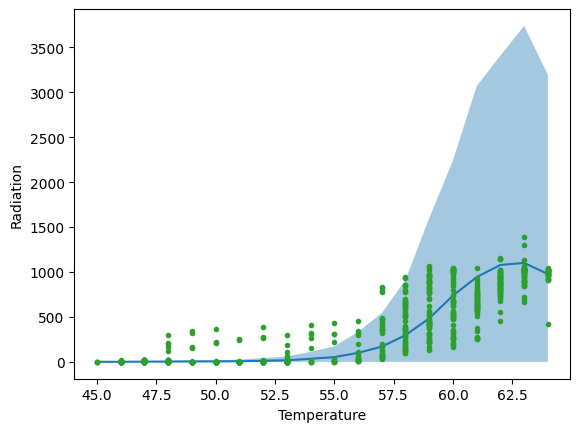

In [28]:
bmb.interpret.plot_predictions(bspline_6, idata_6, "Temperature", pps=True)
plt.plot(solarData.Temperature,solarData.Radiation, "C2.")

**Model 8**

In [20]:
num_knots = 6
knots1 = np.linspace(knots_one[0], knots_one[1], num_knots+2)[1:-1]
knots2 = np.linspace(knots_two[0], knots_two[1], num_knots+2)[1:-1]
knots3 = np.linspace(knots_three[0], knots_three[1], num_knots+2)[1:-1]
bspline_7 = bmb.Model(
    "Radiation ~ bs(Pressure, knots=knots2) + bs(WindDirection, knots=knots3) + bs(Temperature, knots=knots1)",
    solarData,
    family="negativebinomial"
)
idata_7 = bspline_7.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


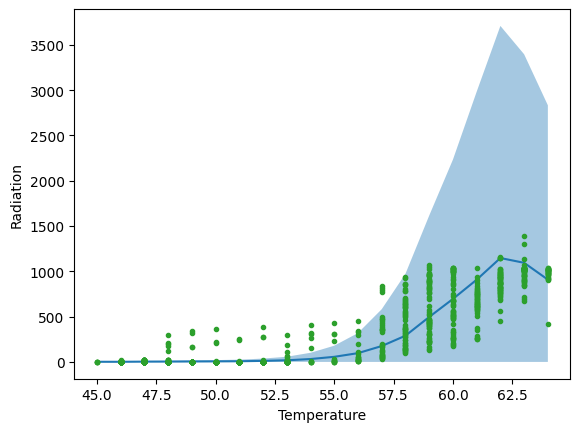

In [29]:
bmb.interpret.plot_predictions(bspline_7, idata_7, "Temperature", pps=True)
plt.plot(solarData.Temperature,solarData.Radiation, "C2.")

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimat

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

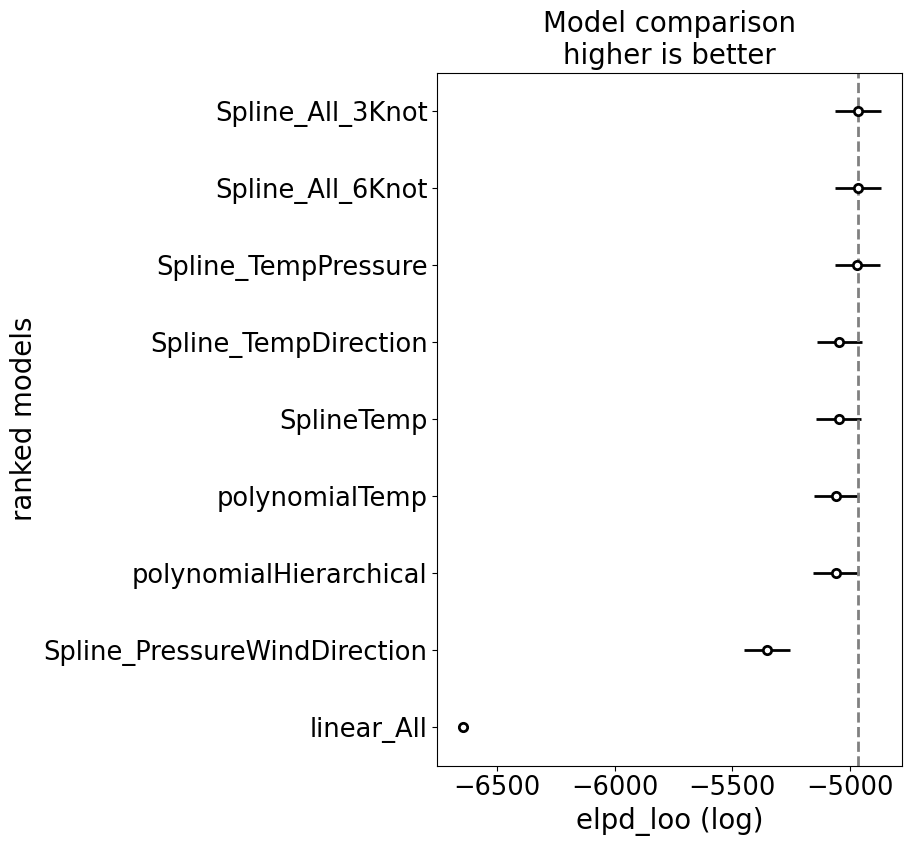

In [24]:
compareModels = az.compare({"linear_All":idatalin1, "polynomialTemp":idata_poly, "polynomialHierarchical":idata_poly2, "SplineTemp":idata_1, "Spline_TempPressure":idata_3, "Spline_TempDirection":idata_4, "Spline_PressureWindDirection":idata_5, "Spline_All_3Knot":idata_6, "Spline_All_6Knot":idata_7})
az.plot_compare(compareModels)

## **Analysis**

**Quantitative Analysis**



If we take a look at the elpd_loo values, we can see that the b-spline model incorporating all three of my predictors performed the best, in relation to the other models.

I first started with a linear model, to create a base comparison and see if a simple model would actually work better. What I ended up finding was that the linear model performed a lot worse than the rest of the b-spline models. I even compared the b-splines to a simple polynomial model to determine which model was the best. I found that the b-spline model with all of them was the best.

I was actually interested to see that the linear model performed the worst. Let me explain why!

**Qualitiative Analysis**

When looking at the best model, I was a little bit confused to see that the best models actually had a downward trend near the end of the graphs. The models seemed to be peroforming very well on the rest of the data, capturing the exponential-like trend of the data as the temperature/wind directon speeds grew larger. However, near the end of the graphs for these models, I observed that the graphs are curving downward.

This does not make much sense to reality. Honestly, the linear model more accurately models the trend. Although it does not have a curved trend, it still continues to increase at a constant rate. So, it increase and matches the current increasing trends in solar radation.

I think it is also important to consider the WindDirection and Pressure b-spline model. It performed very bad and simply created a straight line graph. When we consider it in context, I think that wind direction and pressure by themselves are not always indicative of solar radiation. By themselves, they could represent trends for other catastrophic events like hurricanes and tornadoes. So, by themselves, they are not always going to be true to reality. similarly, temperature by itself also has the same problem. We could have a lot of solar radiation, but if it is cloudy outside, it will be a lower temperature. So, we need all of the variables, so the three predictors together will result in the most accurate models, as seen by the model #1 and #2 with the highest elpd_loo values.

**The best model, I would say, is the Spline_TempPressure model because it uses the two variables in my diagram and produces similar results to the other models with all three variables.** I noticed that the other predictors (WindDirection, WindSpeed, Humidity) were creating collision between the predictors, and this is creating some difficulties for the models to produce results. They are in the middle of my casual diagram with arrows going through them, so mathemtically, it is creating collisions for the model. Thus, the **Spline_TempPressure** model returns the most accurate models.

Also, I think it is going to be important to address the fact that we don't actually need b-splines for this data. The linear model and the polynomial model perform similar results. Although it is not needed, it still helps to improve our model accuracy (based on higher elpd_loo values).